In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("people.txt")
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [3]:
def ruleset_E(df):
    one=0;
    two=0;
    three=0;
    four=0;
    violations = []
    for index,row in df.iterrows():
        # Rule 1: Age should be in the range 0-150
        if not(0 <= row['Age'] <= 150):
            one=one+1;
            violations.append(f"Rule 1 Violated at {index}: Age ({row['Age']}) is not in the range 0-150.")
        
        # Rule 2: Age should be greater than yearsmarried
        if row['Age'] <= row['yearsmarried']:
            two=two+1;
            violations.append(f"Rule 2 Violated at index {index}: Age ({row['Age']}) should be greater than yearsmarried ({row['yearsmarried']}).")
        
        # Rule 3: Status should be married, single, or widowed
        valid_statuses = ['married', 'single', 'widowed']
        if row['status'] not in valid_statuses:
            three=three+1;
            violations.append(f"Rule 3 Violated at index {index}: Status ({row['status']}) is not valid.")
        
        # Rule 4: Age group based on age
        if row['Age'] < 18:
            expected_agegroup = 'child'
        elif 18 <= row['Age'] <= 65:
            expected_agegroup = 'adult'
        else:
            expected_agegroup = 'elderly'
        if row['agegroup'] != expected_agegroup:
            four=four+1;
            violations.append(f"Rule 4 Violated at index {index}: Agegroup ({row['agegroup']}) does not match expected age group ({expected_agegroup}).")
    
    return violations,one,two,three,four

In [4]:
# (i) Check violations
violations,one,two,three,four = ruleset_E(df)

# (ii) Summarize results
if violations:
    print("Violations detected:")
    for violation in violations:
        print(violation)
else:
    print("No violations detected.")


Violations detected:
Rule 2 Violated at index 2: Age (18) should be greater than yearsmarried (20).
Rule 1 Violated at 3: Age (221) is not in the range 0-150.
Rule 4 Violated at index 4: Agegroup (child) does not match expected age group (adult).


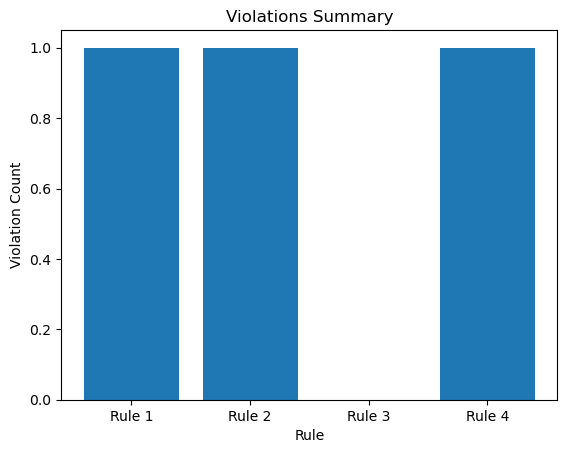

In [5]:
violation_counts = {}
for violation in violations:
    rule = violation.split(':')[0]
    violation_counts[rule] = violation_counts.get(rule, 0) + 1

plt.bar(['Rule 1','Rule 2', 'Rule 3', 'Rule 4'], [one,two,three,four])
plt.xlabel('Rule')
plt.ylabel('Violation Count')
plt.title('Violations Summary')
plt.show()
